In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('train.csv')
train.shape

(90615, 10)

In [ ]:
test = pd.read_csv('test.csv')
test.shape

(60411, 9)

In [ ]:
train.head(10)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
5,5,F,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
6,6,M,0.415,0.325,0.110,0.3315,0.1655,0.0715,0.1300,9
7,7,F,0.610,0.490,0.150,1.1165,0.4955,0.2945,0.2950,9
8,8,I,0.205,0.150,0.040,0.0460,0.0145,0.0105,0.0100,4
9,9,I,0.565,0.425,0.125,0.6510,0.3795,0.1420,0.1800,8


Все данные, кроме пола числовые. Следовательно нужны мимнимальные преобразования

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [ ]:
train = train.drop('id', axis = 1)
test = test.drop('id', axis = 1)

In [ ]:
test.head(5)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [ ]:
train.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
train['Sex'].value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["Sex"] = le.fit_transform(train["Sex"])
train

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
90610,2,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,2,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,1,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,1,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test["Sex"] = le.fit_transform(test["Sex"])
test

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...
60406,1,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,0,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,1,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,0,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [ ]:
def outliers_show(dataset):
  if len(dataset.columns) == 9:
    columns = list(dataset.columns)[:-1]
  else:
    columns = list(dataset.columns)
  fig, axes = plt.subplots(len(columns), 1, figsize=(5, 20))
  for i, column in enumerate(columns):
      sns.boxplot(data=dataset, y=column, ax=axes[i])
      axes[i].set_title(column)

  plt.tight_layout()
  plt.show()

def outliers(dataset):
    if len(dataset.columns) == 9:
      columns = list(dataset.columns)[:-1]
    else:
      columns = list(dataset.columns)
    for column in columns:
      Q1 = dataset[column].quantile(0.25)
      Q3 = dataset[column].quantile(0.75)
      IQR = Q3 - Q1
      lower = Q1 - 1.5*IQR
      upper = Q3 + 1.5*IQR

      upper_array = np.where(dataset[column] >= upper)[0]
      lower_array = np.where(dataset[column] <= lower)[0]

      dataset.drop(index=upper_array, inplace=True)
      dataset.drop(index=lower_array, inplace=True)
      dataset.reset_index(drop=True, inplace=True)

      print(f"Column: {column}, New Shape: {dataset.shape}")

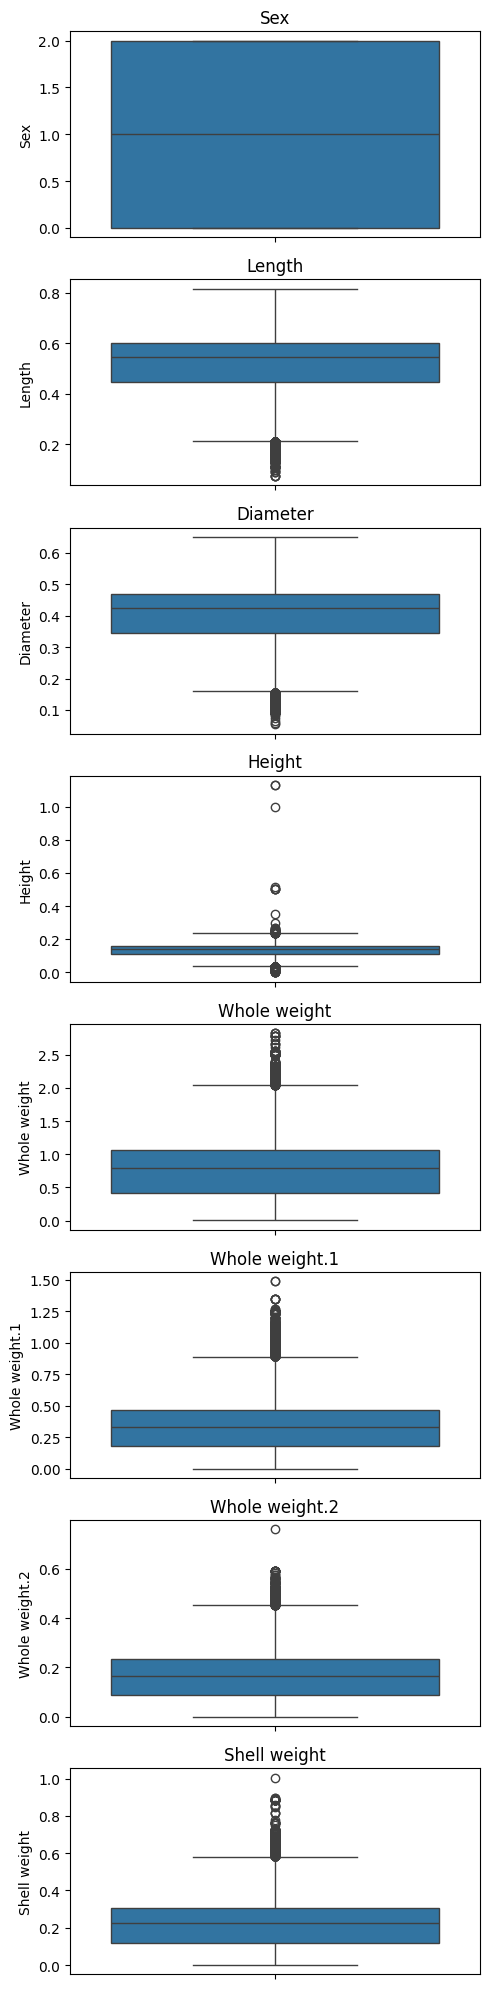

Column: Sex, New Shape: (90615, 9)
Column: Length, New Shape: (89155, 9)
Column: Diameter, New Shape: (88783, 9)
Column: Height, New Shape: (88710, 9)
Column: Whole weight, New Shape: (88089, 9)
Column: Whole weight.1, New Shape: (87489, 9)
Column: Whole weight.2, New Shape: (87359, 9)
Column: Shell weight, New Shape: (86766, 9)


In [ ]:
outliers_show(train)
outliers(train)

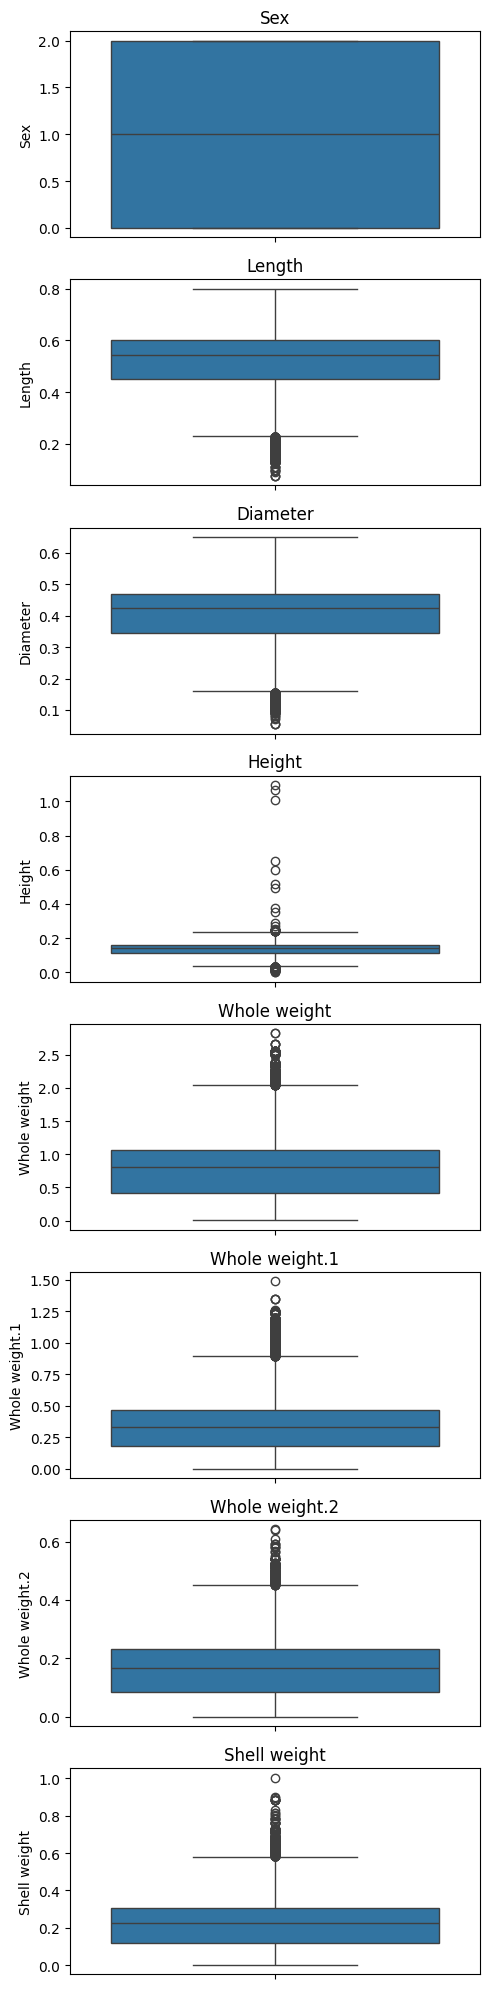

Column: Sex, New Shape: (60411, 8)
Column: Length, New Shape: (59301, 8)
Column: Diameter, New Shape: (59188, 8)
Column: Height, New Shape: (59133, 8)
Column: Whole weight, New Shape: (58700, 8)
Column: Whole weight.1, New Shape: (58366, 8)
Column: Whole weight.2, New Shape: (58270, 8)
Column: Shell weight, New Shape: (57930, 8)


In [ ]:
outliers_show(test)
outliers(test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train.drop(['Rings'], axis=1)
y = train['Rings']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, shuffle=True, random_state=0)

In [ ]:
%pip install optuna

In [ ]:
import optuna
from xgboost import XGBRegressor

In [ ]:
def RMSLE(y_true, y_pred):
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))
def xgboost_optuna(trial):
    xgboost_params = {
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'eval_metric': trial.suggest_categorical('eval_metric', ['rmsle']),
        'lambda': trial.suggest_float('lambda', 0.01, 1.),
        'alpha': trial.suggest_float('alpha', 0.01, 1.),
        'subsample': trial.suggest_float('subsample', 0.01, 1.),
        'objective': trial.suggest_categorical('objective', ['reg:squaredlogerror']),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.),
    }

    model = XGBRegressor(**xgboost_params)
    model.fit(X_train, y_train)
    result = model.predict(X_valid)

    return RMSLE(y_valid, result)

In [ ]:
xgboost_study = optuna.create_study(direction="minimize")
xgboost_study.optimize(xgboost_optuna,n_trials=500,show_progress_bar=True)
xgboost_model = XGBRegressor(**xgboost_study.best_trial.params)

[I 2024-05-30 20:01:48,569] A new study created in memory with name: no-name-5ae2733d-5f30-4cb6-95e5-2a3fd039c9fe


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2024-05-30 20:01:52,125] Trial 0 finished with value: 0.45510889741505917 and parameters: {'max_depth': 26, 'eval_metric': 'rmsle', 'lambda': 0.3524257987068328, 'alpha': 0.13636777481893875, 'subsample': 0.5746182224183066, 'objective': 'reg:squaredlogerror', 'learning_rate': 0.028967320139511754, 'colsample_bytree': 0.21420153084789179}. Best is trial 0 with value: 0.45510889741505917.
[I 2024-05-30 20:01:53,156] Trial 1 finished with value: 0.21413455044015614 and parameters: {'max_depth': 20, 'eval_metric': 'rmsle', 'lambda': 0.2530890097429516, 'alpha': 0.9235150198093478, 'subsample': 0.15173087643837957, 'objective': 'reg:squaredlogerror', 'learning_rate': 0.04429064045979197, 'colsample_bytree': 0.6101078440038983}. Best is trial 1 with value: 0.21413455044015614.
[I 2024-05-30 20:02:04,654] Trial 2 finished with value: 0.20131649322500714 and parameters: {'max_depth': 10, 'eval_metric': 'rmsle', 'lambda': 0.5653451646415899, 'alpha': 0.5912648663876755, 'subsample': 0.35272

можно поставить 320 trails для обучения

In [ ]:
xgboost_model.fit(X_train, y_train)
train_pred = xgboost_model.predict(X_train)
valid_pred = xgboost_model.predict(X_valid)
RMSLE(y_valid, valid_pred), RMSLE(y_train, train_pred)

(0.14455011802391093, 0.14312949624945961)

In [ ]:
submition = pd.read_csv('sample_submission.csv')
submition.shape

(60411, 2)

In [ ]:
submition.head(2)

,id,Rings
0,90615,10
1,90616,10


In [ ]:
test = pd.read_csv('test.csv')
test = test.drop(['id'], axis=1)
test["Sex"] = le.fit_transform(test["Sex"])
test_pred = xgboost_model.predict(test)
test_pred

array([ 9.722802,  9.578413,  9.784583, ..., 11.825527, 12.941321,
        8.715197], dtype=float32)

In [ ]:
test_pred = np.round(test_pred)

In [ ]:
test_pred

array([10., 10., 10., ..., 12., 13.,  9.], dtype=float32)

In [ ]:
submission = pd.DataFrame(test_pred, columns=['Rings'])
test = pd.read_csv('test.csv')
submission['id'] = test['id']
submission.head()

,Rings,id
0,10.0,90615
1,10.0,90616
2,10.0,90617
3,10.0,90618
4,8.0,90619


In [ ]:
submission.to_csv('submission_new.csv', index=False)